In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data = pd.read_excel("../Data/E-Commerce_train.xlsx")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [86]:
data['Warehouse_block'].value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

### Almacen

<AxesSubplot:xlabel='Warehouse_block', ylabel='Count'>

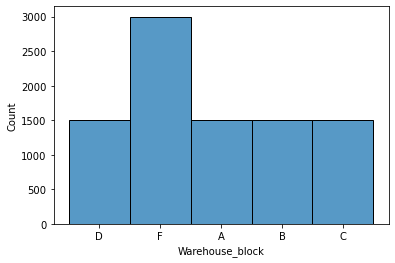

In [87]:
sns.histplot(data['Warehouse_block'])

### Medio de transporte

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Count'>

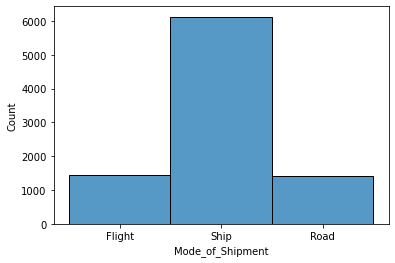

In [88]:
sns.histplot(data['Mode_of_Shipment'])

### Importancia del producto

<AxesSubplot:xlabel='Product_importance', ylabel='Count'>

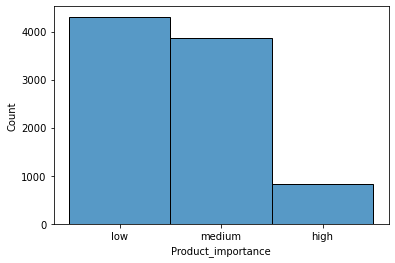

In [89]:
sns.histplot(data['Product_importance'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

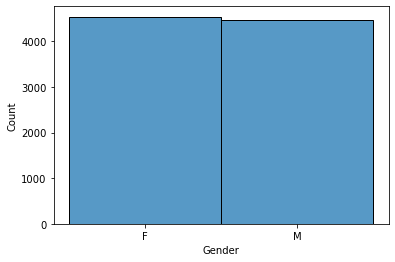

In [90]:
sns.histplot(data['Gender'])

### Outlier

<AxesSubplot:xlabel='Prior_purchases'>

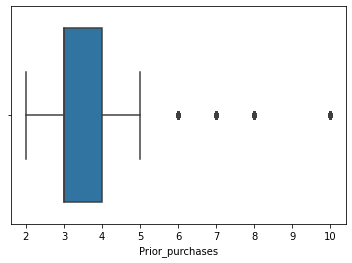

In [91]:
sns.boxplot(x="Prior_purchases",data= data)

In [92]:
Q1 = data["Prior_purchases"].quantile(0.25)
Q3 = data["Prior_purchases"].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

In [93]:
#out_Gv = ((data["Prior_purchases"]<BI) | (data["Prior_purchases"]>BS))
#data = data[~out_Gv]

In [94]:
#sns.boxplot(x="Prior_purchases",data= data)

Discount_offered

<AxesSubplot:xlabel='Discount_offered'>

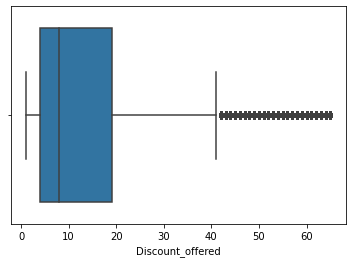

In [95]:
sns.boxplot(x="Discount_offered",data= data)

In [96]:
Q1 = data["Discount_offered"].quantile(0.25)
Q3 = data["Discount_offered"].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

In [97]:
#out_Gv = ((data["Discount_offered"]<BI) | (data["Discount_offered"]>BS))
#data = data[~out_Gv]

In [98]:
#sns.boxplot(x="Discount_offered",data= data)

## Reevaluar la data

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [100]:
data.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

## Separando datos categoricos y numericos

In [101]:
categoricos = [cat for cat in data.columns if data[cat].dtype == "object" and data[cat].nunique() <= 10]

In [102]:
categoricos

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [103]:
numericos = [num for num in data.columns if data[num].dtype != "object"]

In [104]:
numericos.remove('ID')

In [105]:
numericos

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [106]:
data = data[numericos + categoricos]

In [107]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,4,2,177,3,44,1233,1,D,Flight,low,F
1,4,5,216,2,59,3088,1,F,Flight,low,M
2,2,2,183,4,48,3374,1,A,Flight,low,M
3,3,3,176,4,10,1177,1,B,Flight,medium,M
4,2,2,184,3,46,2484,1,C,Flight,medium,F


### Separando en caracteristicas y variable objetivos

In [108]:
X = data.loc[:,[dx for dx in data.columns if dx not in ['Reached.on.Time_Y.N','Gender']]]
y = data['Reached.on.Time_Y.N']

In [109]:
X

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance
0,4,2,177,3,44,1233,D,Flight,low
1,4,5,216,2,59,3088,F,Flight,low
2,2,2,183,4,48,3374,A,Flight,low
3,3,3,176,4,10,1177,B,Flight,medium
4,2,2,184,3,46,2484,C,Flight,medium
...,...,...,...,...,...,...,...,...,...
8994,3,1,217,3,1,4177,D,Ship,low
8995,5,3,232,3,3,4526,F,Ship,medium
8996,4,5,260,3,6,4221,A,Ship,medium
8997,4,2,184,3,5,5931,B,Ship,medium


### Separando valores en train test

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1)

### Pipelines

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate


---------------------------------------------------------------------------------

#### OrdinalEncoder

In [113]:
encoder = OrdinalEncoder()
standard = StandardScaler()

In [114]:
encoder_standard = ColumnTransformer(transformers=[
    ("encoder",encoder,categoricos[:3]),
    ("standar",standard,[num for num in numericos if num not in ['Reached.on.Time_Y.N']])
])

---------------------------------------------------------------------------------

#### OneHotEncoder

In [115]:
encoder2 = OneHotEncoder()
standard2 = StandardScaler()

In [116]:
encoder_standard2 = ColumnTransformer(transformers=[
    ("encoder",encoder2,categoricos[:3]),
    ("standar",standard2,[num for num in numericos if num not in ['Reached.on.Time_Y.N']])
])

-----------------------------------------------------------------------------------------------------------------

#### OrdinalEncoder

In [117]:
modelLogistic = LogisticRegression() 

In [118]:
pipeline_linearR = Pipeline(steps=[
    ("columnsTransforms",encoder_standard),
    ("modeloLineal",modelLogistic)
])

In [119]:
pipeline_linearR.fit(train_x,train_y)

Pipeline(steps=[('columnsTransforms',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('modeloLineal', LogisticRegression())])

In [120]:
prediction = pipeline_linearR.predict(test_x)

In [121]:
from sklearn.metrics import confusion_matrix,recall_score
matrix = confusion_matrix(test_y,prediction)
print(matrix)
print(recall_score(test_y,prediction))

[[ 545  468]
 [ 405 1282]]
0.7599288678126852


----------------------------------------------------------------------

#### OneHotEncoder

In [122]:
pipeline_linear_oh = Pipeline(steps=[
    ("columnsTransforms",encoder_standard2),
    ("modeloLineal",modelLogistic)
])

In [123]:
pipeline_linear_oh.fit(train_x,train_y)

Pipeline(steps=[('columnsTransforms',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('modeloLineal', LogisticRegression())])

In [124]:
prediction_l_oh = pipeline_linear_oh.predict(test_x)

In [125]:
matrix_l_oh = confusion_matrix(test_y,prediction_l_oh)
print(matrix_l_oh)
print(recall_score(test_y,prediction_l_oh))

[[ 543  470]
 [ 407 1280]]
0.7587433313574392


## Arbol de desicion

------------------------------------------------------------------------

#### OrdinalEncoder

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
recall = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ("previo",encoder_standard),
        ("modeloTree",modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

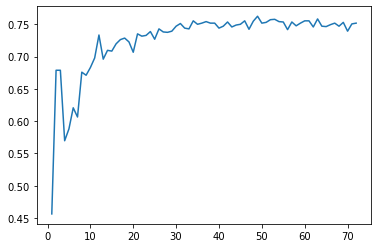

In [128]:
sns.lineplot(x=range(1,73),y=recall)

In [129]:
max(recall)

0.7622999407231772

----------------------------------------------------------

#### OneHotEncoder

In [130]:
recall_tree_oh = []
for i in range(1,73):
    modeloTree = DecisionTreeClassifier(criterion='gini',max_depth=i)
    pipeline_tree = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("modeloTree",modeloTree)
    ])
    pipeline_tree.fit(train_x,train_y)
    prediction_tree = pipeline_tree.predict(test_x)
    recall_tree_oh.append(recall_score(test_y,prediction_tree))

<AxesSubplot:>

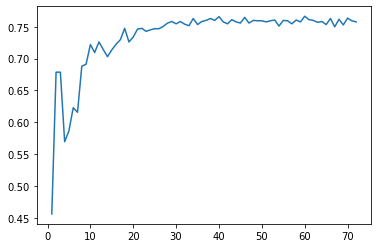

In [131]:
sns.lineplot(x=range(1,73),y=recall_tree_oh)

In [132]:
max(recall_tree_oh)

0.7664493183165383

# Forest

### Ordinal

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [134]:
params_forest = {
    'n_estimators':range(10,30),
    'criterion' : ["gini", "entropy"],
    'max_depth' : range(10,30)
}

In [135]:
modeloForest = RandomForestClassifier(random_state=1)
gridForest = GridSearchCV(modeloForest,params_forest,scoring='recall')

In [136]:
pipeline_forest = Pipeline(steps=[
        ("previo",encoder_standard),
        ("gridForest",gridForest)
    ])

In [137]:
pipeline_forest.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridForest',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                              param_grid={'criterion': [

In [138]:
pred_forest = pipeline_forest.predict(test_x)

In [139]:
recall_score(test_y,pred_forest)

0.7243627741553053

#### OneHot

In [140]:
pipeline_forest2 = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("gridForest",gridForest)
    ])

In [141]:
pipeline_forest2.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridForest',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                              param_grid={'criterion': ['

In [142]:
pred_forest2 = pipeline_forest2.predict(test_x)

In [143]:
recall_score(test_y,pred_forest2)

0.7148784825133373

# KNN

#### Ordinal

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
model_knn = KNeighborsClassifier()

In [146]:
param_knn = {
    'n_neighbors' : range(1,15),
    'weights' : ('uniform','distance'),
    'algorithm' : ("auto", "ball_tree", "kd_tree", "brute")
}

In [147]:
gridknn = GridSearchCV(model_knn,param_knn,scoring='recall')

In [148]:
pipeline_knn = Pipeline(steps=[
        ("previo",encoder_standard),
        ("gridknn",gridknn)
    ])

In [149]:
pipeline_knn.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ('auto', 'ball_tree'

In [150]:
pred_knn = pipeline_knn.predict(test_x)
recall_score(test_y,pred_forest)

0.7243627741553053

#### OneHot

In [151]:
pipeline_knn2 = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("gridknn",gridknn)
    ])

In [152]:
pipeline_knn2.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ('auto', 'ball_tree',

In [153]:
pred_knn2 = pipeline_knn2.predict(test_x)
recall_score(test_y,pred_knn2)

0.7273266152934202

# SVM

#### Ordinal

In [154]:
from sklearn.svm import SVC

In [155]:
parametros_svm = {
    'kernel':("linear", "poly", "rbf", "sigmoid"),
    'gamma' : ("scale","auto")
}

In [156]:
modelSVC = SVC(random_state=1)
gridSVC = GridSearchCV(modelSVC,parametros_svm,scoring='recall')

In [157]:
pipeline_svc = Pipeline(steps=[
        ("previo",encoder_standard),
        ("gridknn",gridSVC)
    ])

In [158]:
pipeline_svc.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=SVC(random_state=1),
                              param_grid={'gamma': ('scale', 'auto'),
        

In [159]:
pred_svc= pipeline_svc.predict(test_x)
recall_score(test_y,pred_svc)

0.7593360995850622

#### OneHot

In [160]:
pipeline_svc2 = Pipeline(steps=[
        ("previo",encoder_standard2),
        ("gridknn",gridSVC)
    ])

In [161]:
pipeline_svc2.fit(train_x,train_y)

Pipeline(steps=[('previo',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Product_importance']),
                                                 ('standar', StandardScaler(),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms'])])),
                ('gridknn',
                 GridSearchCV(estimator=SVC(random_state=1),
                              param_grid={'gamma': ('scale', 'auto'),
         

In [162]:
pred_svc2= pipeline_svc2.predict(test_x)
recall_score(test_y,pred_svc2)

0.7996443390634262

# Ecomerce

In [163]:
ecomerce = pd.read_excel('../Data/E-Commerce_test.xlsx')

In [165]:
ecomerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [166]:
categoricos_e = [cat for cat in ecomerce.columns if ecomerce[cat].dtype == "object" and ecomerce[cat].nunique() <= 10]
numericos_e = [num for num in ecomerce.columns if ecomerce[num].dtype != "object"]

In [167]:
categoricos_e

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [169]:
numericos_e.remove('ID')

In [170]:
numericos_e

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

In [171]:
ecommerce_test = ecomerce[numericos_e+categoricos_e]

In [172]:
ecommerce_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,5,1,189,2,10,5248,F,Ship,medium,M
1,5,3,150,2,9,4446,D,Ship,high,F
2,3,3,200,3,3,5739,F,Ship,low,M
3,5,1,133,2,1,4643,A,Ship,medium,M
4,4,2,260,3,4,5504,B,Ship,low,M


In [173]:
pred_final= pipeline_svc2.predict(ecommerce_test)

In [177]:
df = pd.DataFrame({'pred':pred_final})

In [180]:
df.to_csv("../Edward-Htc.csv",index=False)